In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prepare as prep

import functions as f

import warnings
warnings.filterwarnings('ignore')

from scipy import stats

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('wine_df.csv')
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'sulphates'], inplace=True)
df.rename(columns={'fixed acidity':'fixed','volatile acidity':'volatile','citric acid':'citric',
           'residual sugar':'sugar','free sulfur dioxide':'fso2','total sulfur dioxide':'tso2'}, inplace=True)

In [3]:
col_list = df.select_dtypes(include=['float64','int64']).columns[:-1]

In [4]:
df, var_fences = prep.remove_outliers(df)

quality column ignored
type column ignored


In [5]:
df.head()

,fixed,volatile,citric,sugar,chlorides,fso2,tso2,density,pH,alcohol,quality,type
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,9.9,6,white
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,10.1,6,white


In [6]:
df = df[(df['quality']!=3) & (df['quality']!=9)]

In [73]:
baseline = (df['quality']==6).mean()

In [8]:
df = pd.get_dummies(df, columns=['type'])

In [9]:
X_train, y_train, X_val, y_val, X_test, y_test = prep.x_y_split(df, 'quality')

In [10]:
X_train.head()

,fixed,volatile,citric,sugar,chlorides,fso2,tso2,density,pH,alcohol,type_red,type_white
3498,6.4,0.30,0.36,2.00,0.052,18.0,141.0,0.99273,3.38,10.5,0,1
2089,7.9,0.17,0.32,1.60,0.053,47.0,150.0,0.99480,3.29,9.6,0,1
4934,7.8,0.60,0.14,2.40,0.086,3.0,15.0,0.99750,3.42,10.8,1,0
446,5.8,0.28,0.27,2.60,0.054,30.0,156.0,0.99140,3.53,12.4,0,1
3392,6.7,0.38,0.26,9.55,0.036,35.0,91.0,0.99190,2.98,12.4,0,1


In [11]:
X = [X_train, X_val, X_test]

In [12]:
X = f.cluster_so2(X)

In [13]:
X = f.cluster_acids(X)

In [14]:
X = f.cluster_visc(X)

In [15]:
X[0]

,fixed,volatile,citric,sugar,chlorides,fso2,tso2,density,pH,alcohol,...,so2,centroid_fso2,centroid_tso2,acids,centroid_fixed,centroid_volatile,centroid_citric,visc,centroid_density,centroid_alcohol
3498,6.4,0.30,0.36,2.00,0.052,18.0,141.0,0.99273,3.38,10.5,...,0,30.057734,120.983115,2,6.064677,0.282930,0.296129,4,0.994751,10.162013
2089,7.9,0.17,0.32,1.60,0.053,47.0,150.0,0.99480,3.29,9.6,...,0,30.057734,120.983115,2,6.064677,0.282930,0.296129,4,0.994751,10.162013
4934,7.8,0.60,0.14,2.40,0.086,3.0,15.0,0.99750,3.42,10.8,...,0,30.057734,120.983115,2,6.064677,0.282930,0.296129,4,0.994751,10.162013
446,5.8,0.28,0.27,2.60,0.054,30.0,156.0,0.99140,3.53,12.4,...,0,30.057734,120.983115,2,6.064677,0.282930,0.296129,4,0.994751,10.162013
3392,6.7,0.38,0.26,9.55,0.036,35.0,91.0,0.99190,2.98,12.4,...,0,30.057734,120.983115,2,6.064677,0.282930,0.296129,4,0.994751,10.162013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5055,7.1,0.43,0.42,5.50,0.071,28.0,128.0,0.99730,3.42,10.5,...,2,48.490486,199.017970,0,7.037187,0.292225,0.317263,3,0.991709,11.904283
545,6.4,0.16,0.22,1.40,0.040,41.0,149.0,0.99330,3.49,10.0,...,2,48.490486,199.017970,0,7.037187,0.292225,0.317263,3,0.991709,11.904283
3501,6.7,0.24,0.36,8.40,0.042,42.0,123.0,0.99473,3.34,10.9,...,2,48.490486,199.017970,0,7.037187,0.292225,0.317263,3,0.991709,11.904283
4263,7.0,0.55,0.05,8.00,0.036,19.0,164.0,0.99269,3.26,12.2,...,2,48.490486,199.017970,0,7.037187,0.292225,0.317263,3,0.991709,11.904283


In [20]:
X[0].drop(columns=['centroid_fso2', 'centroid_tso2','centroid_fixed',
                   'centroid_volatile','centroid_citric','centroid_density','centroid_alcohol'], inplace=True)

In [21]:
X[1].drop(columns=['centroid_fso2', 'centroid_tso2','centroid_fixed',
                   'centroid_volatile','centroid_citric','centroid_density','centroid_alcohol'], inplace=True)

In [22]:
X[2].drop(columns=['centroid_fso2', 'centroid_tso2','centroid_fixed',
                   'centroid_volatile','centroid_citric','centroid_density','centroid_alcohol'], inplace=True)

In [47]:
X[0]

,fixed,volatile,citric,sugar,chlorides,fso2,tso2,density,pH,alcohol,type_red,type_white,so2,acids,visc
3498,6.4,0.30,0.36,2.00,0.052,18.0,141.0,0.99273,3.38,10.5,0,1,0,2,4
2089,7.9,0.17,0.32,1.60,0.053,47.0,150.0,0.99480,3.29,9.6,0,1,0,2,4
4934,7.8,0.60,0.14,2.40,0.086,3.0,15.0,0.99750,3.42,10.8,1,0,0,2,4
446,5.8,0.28,0.27,2.60,0.054,30.0,156.0,0.99140,3.53,12.4,0,1,0,2,4
3392,6.7,0.38,0.26,9.55,0.036,35.0,91.0,0.99190,2.98,12.4,0,1,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5055,7.1,0.43,0.42,5.50,0.071,28.0,128.0,0.99730,3.42,10.5,1,0,2,0,3
545,6.4,0.16,0.22,1.40,0.040,41.0,149.0,0.99330,3.49,10.0,0,1,2,0,3
3501,6.7,0.24,0.36,8.40,0.042,42.0,123.0,0.99473,3.34,10.9,0,1,2,0,3
4263,7.0,0.55,0.05,8.00,0.036,19.0,164.0,0.99269,3.26,12.2,0,1,2,0,3


In [27]:
X_train, X_val, X_test = X[0], X[1], X[2]

In [50]:
X_train = pd.get_dummies(X_train, columns=['so2', 'acids','visc'])

In [51]:
X_val = pd.get_dummies(X_val, columns=['so2', 'acids','visc'])

In [52]:
X_test = pd.get_dummies(X_test, columns=['so2', 'acids','visc'])

In [53]:
tree_train = []
tree_val = []
depth = []
for i in range(2, 21):
    train_tree = DecisionTreeClassifier(max_depth=i, random_state=42)
    train_tree = train_tree.fit(X_train, y_train)
    
    tree_train.append(train_tree.score(X_train, y_train))
    tree_val.append(train_tree.score(X_val, y_val))
    depth.append(i)

In [54]:
scores = pd.DataFrame({'score':tree_train,
                       'type':'train',
                       'depth':depth})

In [55]:
val_scores = pd.DataFrame({'score':tree_val,
                           'type':'val',
                           'depth':depth})

In [56]:
scores = scores.append(val_scores)

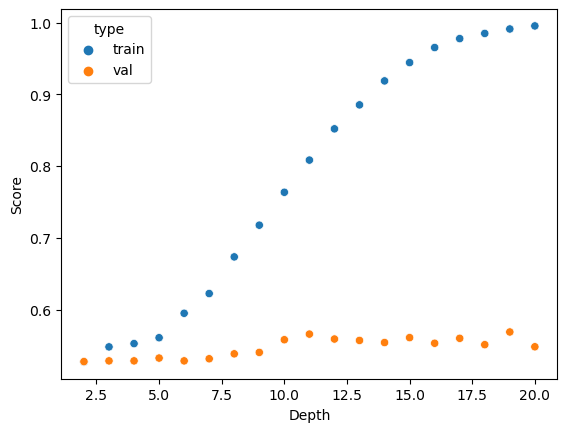

In [57]:
sns.scatterplot(x='depth', y='score', data=scores, hue='type')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.show()

In [58]:
rfc_train = []
rfc_val = []
depth = []
for i in range(2, 21):
    rf = RandomForestClassifier(bootstrap=True, 
                                class_weight=None, 
                                criterion='gini',
                                min_samples_leaf=3,
                                n_estimators=100,
                                max_depth=i, 
                                random_state=42)
    
    rf.fit(X_train, y_train)
    
    rfc_train.append(rf.score(X_train, y_train))
    rfc_val.append(rf.score(X_val, y_val))
    depth.append(i)

In [59]:
rfc_scores = pd.DataFrame({'score':rfc_train,
                           'type':'train',
                           'depth':depth})

val_rfc_scores = pd.DataFrame({'score':rfc_val,
                               'type':'val',
                               'depth':depth})

rfc_scores = rfc_scores.append(val_rfc_scores)

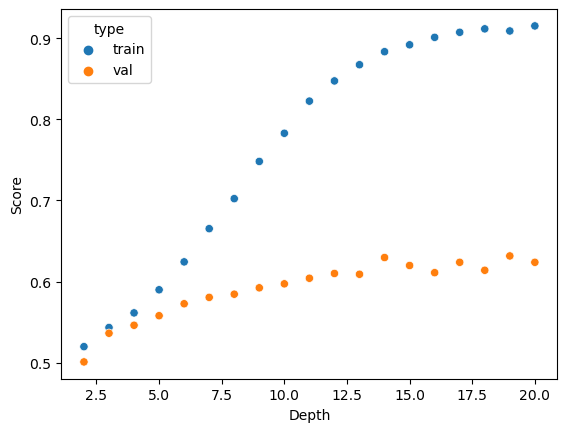

In [60]:
sns.scatterplot(x='depth', y='score', data=rfc_scores, hue='type')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.show()

In [61]:
logit = LogisticRegression(C=1, random_state=42, solver='lbfgs')
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print('lbfgs')
print('Train: ', logit.score(X_train, y_train))
print('Val: ', logit.score(X_val, y_val))

lbfgs
Train:  0.48083851948902717
Val:  0.449901768172888


In [63]:
logit = LogisticRegression(C=1, random_state=42, solver='newton-cg')
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print('newton-cg')
print('Train: ', logit.score(X_train, y_train))
print('Val: ', logit.score(X_val, y_val))

newton-cg
Train:  0.5456927612184737
Val:  0.49410609037328096


In [64]:
logit = LogisticRegression(C=2, random_state=42, solver='liblinear')
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print('liblinear')
print('Train: ', logit.score(X_train, y_train))
print('Val: ', logit.score(X_val, y_val))

liblinear
Train:  0.5388142810350475
Val:  0.4675834970530452


In [65]:
logit = LogisticRegression(C=1, random_state=42, solver='sag')
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print('sag')
print('Train: ', logit.score(X_train, y_train))
print('Val: ', logit.score(X_val, y_val))

sag
Train:  0.48411398624303964
Val:  0.468565815324165


In [66]:
logit = LogisticRegression(C=1, random_state=42, solver='saga')
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print('saga')
print('Train: ', logit.score(X_train, y_train))
print('Val: ', logit.score(X_val, y_val))

saga
Train:  0.4788732394366197
Val:  0.4538310412573674


In [67]:
knn_train = []
knn_val = []
depth = []

for i in range(2, 51):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    y_pred_proba = knn.predict_proba(X_train)
    
    depth.append(i)
    knn_train.append(knn.score(X_train, y_train))
    knn_val.append(knn.score(X_val, y_val))

In [68]:
knn_scores = pd.DataFrame({'score':knn_train,
                           'type':'train',
                           'depth':depth})

val_knn_scores = pd.DataFrame({'score':knn_val,
                               'type':'val',
                               'depth':depth})

knn_scores = knn_scores.append(val_knn_scores)

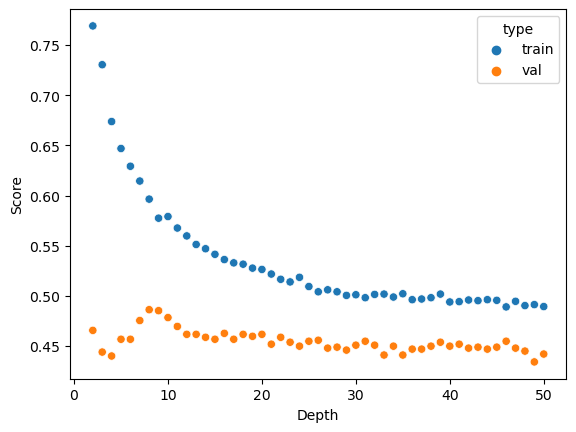

In [69]:
sns.scatterplot(x='depth', y='score', data=knn_scores, hue='type')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.show()

In [70]:
rfc_scores[rfc_scores['depth']==5]

,score,type,depth
3,0.589912,train,5
3,0.557957,val,5


In [71]:
scores[scores['depth']==5]

,score,type,depth
3,0.560760,train,5
3,0.532417,val,5


In [72]:
rf = RandomForestClassifier(bootstrap=True, 
                                class_weight=None, 
                                criterion='gini',
                                min_samples_leaf=3,
                                n_estimators=100,
                                max_depth=i, 
                                random_state=42)
    
rf.fit(X_train, y_train)

rf.score(X_test, y_test)

0.6227897838899804

In [74]:
baseline

0.45057968166633916